# Multi-layer Perceptron

In this notebook, we will be introducing the `keras` package. We will be using the same dataset that we used in the previous notebook. Let's create a multi-layer perceptron model.

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.backend import set_image_dim_ordering


set_image_dim_ordering('th')
random.seed(123)
# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

Using Theano backend.


In [2]:
#read the datasets

train = pd.read_csv("../data/intro_to_ann.csv")

In [3]:
X, y = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])

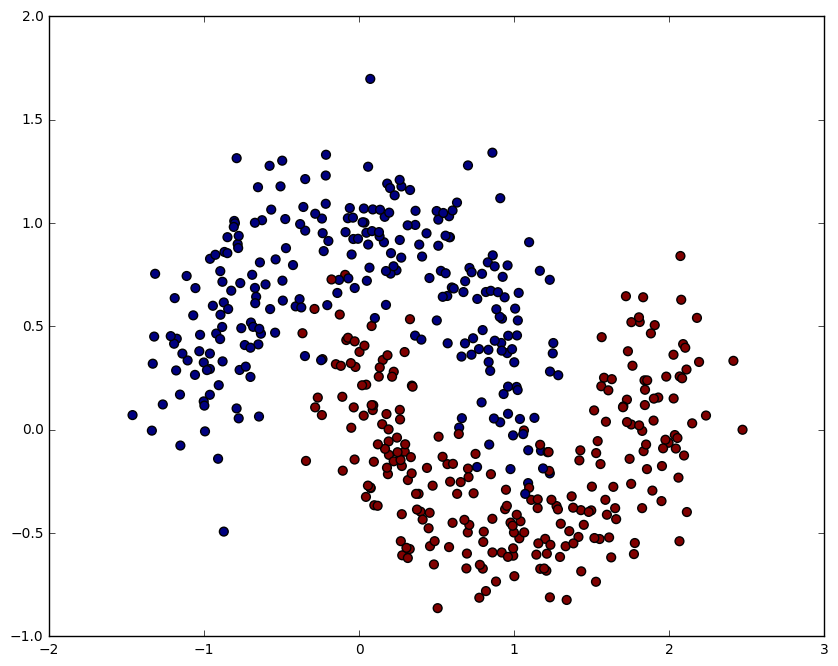

In [4]:
#Let's plot the dataset and see how it is
plt.scatter(X[:,0], X[:,1], s=40, c=y)

### Our first Multi-layer Perceptron Model

In [5]:
# We are going to build a Sequential model - adding one layer at a time
model = Sequential()

# Dense layer means a fully-connected layer. 
# The layer takes in input of dimension 2 and provides an output of dimension 1.
model.add(Dense(1, input_dim=2, init='uniform'))

# The activation function to be used for computing at that layer is tanh
model.add(Activation('tanh'))

# Define the stochastic gradient descent's parameters
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# compile the model. Provide loss function as mean squared error
model.compile(loss='mean_squared_error', optimizer=sgd)

# Fit the model
model.fit(X, y, nb_epoch=5, batch_size=2)

Epoch 1/5
500/500 [==============================] - 0s - loss: 0.2166     
Epoch 2/5
500/500 [==============================] - 0s - loss: 0.1618     
Epoch 3/5
500/500 [==============================] - 0s - loss: 0.1499     
Epoch 4/5
500/500 [==============================] - 0s - loss: 0.1524     
Epoch 5/5
500/500 [==============================] - 0s - loss: 0.1694     


In [6]:
prediction = model.predict(X, batch_size=16)

In [7]:
prediction

array([[ 0.79103947],
       [ 0.90464634],
       [-0.02046281],
       [ 0.53122067],
       [ 0.86988586],
       [ 0.60508621],
       [ 0.62641132],
       [ 0.78512996],
       [ 0.81288683],
       [-0.3926647 ],
       [ 0.74342448],
       [ 0.65221328],
       [-0.15037608],
       [ 0.84242451],
       [ 0.8012737 ],
       [ 0.43304515],
       [ 0.35745767],
       [ 0.90228307],
       [ 0.14760235],
       [ 0.72268319],
       [ 0.56475925],
       [ 0.89882773],
       [ 0.75116038],
       [ 0.26915303],
       [ 0.83313799],
       [ 0.87746185],
       [ 0.8878395 ],
       [ 0.92052603],
       [ 0.86527467],
       [ 0.37361595],
       [ 0.4255462 ],
       [ 0.7743811 ],
       [ 0.69317544],
       [ 0.17158607],
       [-0.18058556],
       [ 0.77256942],
       [ 0.89368027],
       [ 0.86221325],
       [-0.10061378],
       [ 0.91767234],
       [ 0.3349095 ],
       [ 0.13130997],
       [ 0.81770289],
       [ 0.07467991],
       [ 0.71745312],
       [ 0

In [8]:
prediction_classes = model.predict_classes(X, batch_size=16)

 16/500 [..............................] - ETA: 0s

In [9]:
prediction_classes[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

In [10]:
np.unique(prediction_classes)

array([0, 1], dtype=int32)

In [11]:
## What does that mean?

**Exercise** Run the above code for a different batch size

**Exercise** Run the above code for more number of epochs

### Adding a second layer to the MLP

In [12]:
model = Sequential()
model.add(Dense(input_dim=2, output_dim=20, init='uniform'))
model.add(Activation('tanh'))

model.add(Dense(input_dim=20, output_dim=1, init='uniform'))
model.add(Activation('tanh'))



sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.fit(X, y, nb_epoch=20, batch_size=2)

Epoch 1/20
500/500 [==============================] - 0s - loss: 0.1687     
Epoch 2/20
500/500 [==============================] - 0s - loss: 0.1469     
Epoch 3/20
500/500 [==============================] - 0s - loss: 0.1427     
Epoch 4/20
500/500 [==============================] - 0s - loss: 0.1314     
Epoch 5/20
500/500 [==============================] - 0s - loss: 0.1487     
Epoch 6/20
500/500 [==============================] - 0s - loss: 0.1568     
Epoch 7/20
500/500 [==============================] - 0s - loss: 0.1581     
Epoch 8/20
500/500 [==============================] - 0s - loss: 0.1414     
Epoch 9/20
500/500 [==============================] - 0s - loss: 0.1874     
Epoch 10/20
500/500 [==============================] - 0s - loss: 0.1451     
Epoch 11/20
500/500 [==============================] - 0s - loss: 0.2536     
Epoch 12/20
500/500 [==============================] - 0s - loss: 0.1465     
Epoch 13/20
500/500 [==============================] - 0s - loss: 0.1797 

**Exercise** Evaluate and predict the model

### Adding more layers to the MLP

In [13]:
model = Sequential()
model.add(Dense(input_dim=2, output_dim=20, init='uniform'))
model.add(Activation('tanh'))

model.add(Dense(input_dim=20, output_dim=10, init='uniform'))
model.add(Activation('tanh'))

model.add(Dense(input_dim=10, output_dim=1, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

model.fit(X, y, nb_epoch=20, batch_size=2)

Epoch 1/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 2/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 3/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 4/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 5/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 6/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 7/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 8/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 9/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 10/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 11/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 12/20
500/500 [==============================] - 0s - loss: 0.5000     
Epoch 13/20
500/500 [==============================] - 0s - loss: 0.5000 

**Exercise** Evaluate and predict the model

**Exercise** In the third layer of the above model, set the activation function to `tanh` instead of `softmax`. Run the model, evaluate and predict